### Exploratory Data Analysis to visualise and understand the nuances of the scrapped datasets for product images and user images respectively.

In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

DATA CLEANING AND FEATURE ENGINEERING

In [3]:
# Load dataset containing shades information
shades = pd.read_csv("content/makeup.csv")
shades.head()

,Label,Brand,ProductName,HEXColor,SkinTone,ProductURL,Price,SkinType
0,foundation,Hegai and Esther,Photo Perfect,#f6a762,porcelain skin,"<a href=""""></a>",#,normal
1,foundation,Hegai and Esther,Photo Perfect,#d76b4c,olive skin,"<a href=""""></a>",#00,normal
2,foundation,Hegai and Esther,Photo Perfect,#ad543d,dark skin,"<a href=""""></a>",#00,normal
3,foundation,Hegai and Esther,Photo Perfect,#c86835,olive skin,"<a href=""""></a>",#00,normal
4,foundation,Hegai and Esther,Photo Perfect,#904134,dark skin,"<a href=""""></a>",#00,normal


In [36]:
shades.shape

(625, 10)

In [37]:
shades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          625 non-null    object 
 1   brand_short    625 non-null    object 
 2   product        625 non-null    object 
 3   product_short  625 non-null    object 
 4   hex            625 non-null    object 
 5   H              613 non-null    float64
 6   S              613 non-null    float64
 7   V              613 non-null    float64
 8   L              625 non-null    int64  
 9   group          625 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 49.0+ KB


In [38]:
shades.describe()

,H,S,V,L,group
count,613.000000,613.000000,613.000000,625.000000,625.000000
mean,25.314845,0.459494,0.779543,65.920000,3.472000
std,5.327852,0.154089,0.173955,17.512267,1.976529
min,4.000000,0.100000,0.200000,11.000000,0.000000
25%,23.000000,0.350000,0.690000,55.000000,2.000000
50%,26.000000,0.440000,0.840000,71.000000,3.000000
75%,29.000000,0.560000,0.910000,79.000000,5.000000
max,45.000000,1.000000,1.000000,95.000000,7.000000


In [39]:
# Drop columns which are not required .ie. brand_short, product_short
shades.drop(["brand_short", "product_short"], axis="columns", inplace=True)
shades.head()

,brand,product,hex,H,S,V,L,group
0,Maybelline,Fit Me,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,Fit Me,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,Fit Me,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,Fit Me,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,Fit Me,bd9584,18.0,0.30,0.74,65,2


In [40]:
# Rename the columns of the shades dataset to improve readability and descriptiveness
shades.columns = ['Brand', 'Product_Name', 'Hex_Value', 'Hue', 'Saturation', 'Value', 'Lightness', 'Group']
shades.columns = ['Label','Brand','Product Name','HEX Color','Skin Tone','Product URL','Price','Skin Type']
shades.head()


,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
0,Maybelline,Fit Me,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,Fit Me,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,Fit Me,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,Fit Me,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,Fit Me,bd9584,18.0,0.30,0.74,65,2


In [47]:
""" There are 625 products in the dataset. 
    However, not all the products are of interest with respect to the audience under study (NIGERIAN BEAUTY MARKET).
    
    The products of interest and their respective values for the 'group' column are the following;
    • Group 0: Fenty Beauty's PRO FILT'R Foundation Only
    • Group 3: BIPOC-recommended Brands with Black Founders with a wide range of shades (according to a study conducted by: https://pudding.cool/2018/06/makeup-shades/)
    • Group 4: BIPOC-recommended Brands with White Founders
    • Group 5: Nigerian Best Sellers (Nigerian-owned brands)
    
    NOTE: BIPOC-recommended brands are brands which are recommended for Black, Indigenous, and People of Color(BIPOC).
"""
# Select the products of interest using their group values
# Filter the products of interest based on group values
values_to_keep = [0, 3, 4, 5]


# Create a new dataframe with selected columns
clean_shades_df = shades.query('Group in @values_to_keep')

# Display new dataframe
clean_shades_df.head(10)

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
167,Fenty,PRO FILT'R,fde9de,21.0,0.12,0.99,94,0
168,Fenty,PRO FILT'R,fde7da,22.0,0.14,0.99,93,0
169,Fenty,PRO FILT'R,fde3cc,28.0,0.19,0.99,92,0
170,Fenty,PRO FILT'R,f2d3b1,31.0,0.27,0.95,87,0
171,Fenty,PRO FILT'R,fce1c6,30.0,0.21,0.99,91,0
172,Fenty,PRO FILT'R,efd1b7,28.0,0.23,0.94,86,0
173,Fenty,PRO FILT'R,f4cca8,28.0,0.31,0.96,85,0
174,Fenty,PRO FILT'R,e8bfa3,24.0,0.30,0.91,80,0
175,Fenty,PRO FILT'R,fad5b8,26.0,0.26,0.98,88,0
176,Fenty,PRO FILT'R,e9c39f,29.0,0.32,0.91,81,0


In [48]:
clean_shades_df.tail(10)

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
484,Elsas Pro,Full Coverage,88614d,20.0,0.43,0.53,45,5
485,Elsas Pro,Full Coverage,ba8261,22.0,0.48,0.73,60,5
486,Elsas Pro,Full Coverage,d9ab88,26.0,0.37,0.85,74,5
487,Elsas Pro,Full Coverage,d49a74,24.0,0.45,0.83,69,5
488,Elsas Pro,Full Coverage,cf8a60,23.0,0.54,0.81,64,5
489,Kuddy,Matte Wear,c78660,22.0,0.52,0.78,62,5
490,Kuddy,Matte Wear,e0a260,31.0,0.57,0.88,72,5
491,Kuddy,Matte Wear,cc8b65,22.0,0.50,0.80,64,5
492,Kuddy,Matte Wear,c78660,22.0,0.52,0.78,62,5
493,Kuddy,Matte Wear,b2724f,21.0,0.56,0.70,54,5


In [49]:
# Reset the index of the new DataFrame (ignoring index in original shades DataFrame)
clean_shades_df = clean_shades_df.reset_index(drop=True)
clean_shades_df.head()

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
0,Fenty,PRO FILT'R,fde9de,21.0,0.12,0.99,94,0
1,Fenty,PRO FILT'R,fde7da,22.0,0.14,0.99,93,0
2,Fenty,PRO FILT'R,fde3cc,28.0,0.19,0.99,92,0
3,Fenty,PRO FILT'R,f2d3b1,31.0,0.27,0.95,87,0
4,Fenty,PRO FILT'R,fce1c6,30.0,0.21,0.99,91,0


In [50]:
# Total number of products of interest in new DataFrame
clean_shades_df.shape

(287, 8)

In [51]:
# Number of indigenous Nigerian brands in dataset (Group column with a value of 5)
clean_shades_df[clean_shades_df["Group"] == 5].shape

(50, 8)

In [52]:
# Display the indigenous Nigerian brands in dataset
clean_shades_df[clean_shades_df["Group"] == 5].head()

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
237,Hegai and Ester,Photo Perfect,f6a762,28.0,0.60,0.96,75,5
238,Hegai and Ester,Photo Perfect,d76b4c,13.0,0.65,0.84,58,5
239,Hegai and Ester,Photo Perfect,ad543d,12.0,0.65,0.68,47,5
240,Hegai and Ester,Photo Perfect,c86835,21.0,0.74,0.78,55,5
241,Hegai and Ester,Photo Perfect,904134,8.0,0.64,0.56,38,5


In [57]:
# Update the 'Group' column where 'Brand' is "Hegai and Ester" due to a mispelling of the brand name
clean_shades_df.loc[clean_shades_df['Brand'] == 'Hegai and Ester', 'Brand'] = 'Hegai and Esther'

clean_shades_df[clean_shades_df["Group"] == 5].head(10)

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
237,Hegai and Esther,Photo Perfect,f6a762,28.0,0.60,0.96,75,5
238,Hegai and Esther,Photo Perfect,d76b4c,13.0,0.65,0.84,58,5
239,Hegai and Esther,Photo Perfect,ad543d,12.0,0.65,0.68,47,5
240,Hegai and Esther,Photo Perfect,c86835,21.0,0.74,0.78,55,5
241,Hegai and Esther,Photo Perfect,904134,8.0,0.64,0.56,38,5
242,Hegai and Esther,Photo Perfect,92524e,4.0,0.47,0.57,43,5
243,Hegai and Esther,Photo Perfect,bf6b44,19.0,0.64,0.75,55,5
244,Hegai and Esther,Photo Perfect,915831,24.0,0.66,0.57,43,5
245,Hegai and Esther,Photo Perfect,ea8944,25.0,0.71,0.92,67,5
246,Hegai and Esther,Photo Perfect,eebb7a,34.0,0.49,0.93,80,5


### Exploratory Data Aanalysis(EDA) of Products Dataset

In [58]:
# Checking for missing values
clean_shades_df.isnull().sum()

# There are no missing values, so we do not need to handle missing values by imputing or removing them

Brand           0
Product_Name    0
Hex_Value       0
Hue             0
Saturation      0
Value           0
Lightness       0
Group           0
dtype: int64

In [59]:
# Create a dictionary to map old values to new values
group_mapping = {
    0: 'Fenty Beauty',
    3: 'Black Founded BIPOC-recommended Brands',
    4: 'White Founded BIPOC-recommended Brands',
    5: 'Nigerian-owned makeup brands'
}

# Use map function to replace old values with new values in 'Group' column for better understanding when perorming EDA
clean_shades_df['Group'] = clean_shades_df['Group'].map(group_mapping)

In [60]:
clean_shades_df.head()

,Brand,Product_Name,Hex_Value,Hue,Saturation,Value,Lightness,Group
0,Fenty,PRO FILT'R,fde9de,21.0,0.12,0.99,94,Fenty Beauty
1,Fenty,PRO FILT'R,fde7da,22.0,0.14,0.99,93,Fenty Beauty
2,Fenty,PRO FILT'R,fde3cc,28.0,0.19,0.99,92,Fenty Beauty
3,Fenty,PRO FILT'R,f2d3b1,31.0,0.27,0.95,87,Fenty Beauty
4,Fenty,PRO FILT'R,fce1c6,30.0,0.21,0.99,91,Fenty Beauty


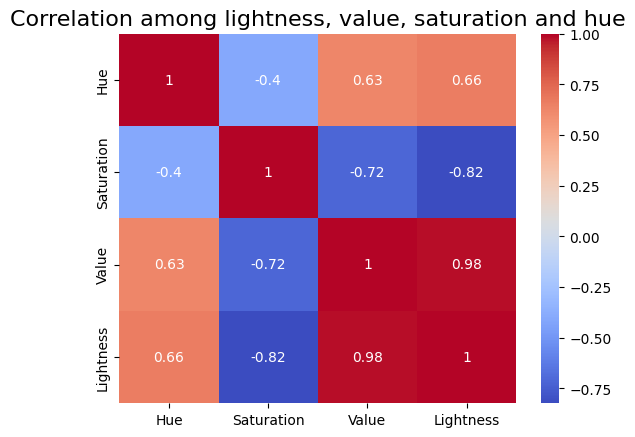

In [61]:
# Calculating correlation coefficients
correlation = clean_shades_df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation among lightness, value, saturation and hue", fontsize=16)
plt.show()

In [64]:
# Visualize the distribution of products across different groups
group_counts = clean_shades_df['Group'].value_counts()
fig = px.bar(group_counts, x=group_counts.index, y=group_counts.values, title='Distribution of Products across Groups')

# Define x and y labels
fig.update_xaxes(title="Group")
fig.update_yaxes(title="Count")

fig.show()

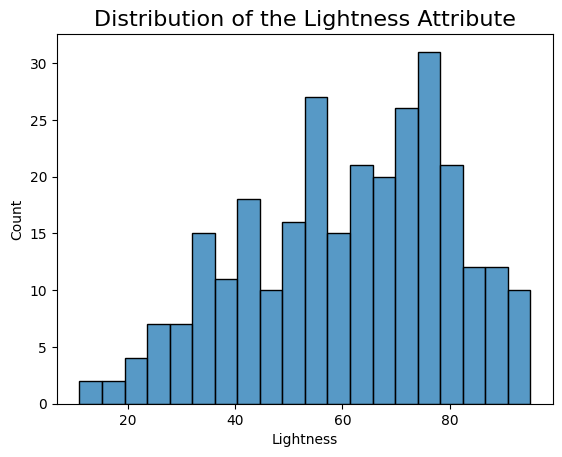

In [65]:
# Visualizing data distribution of the Lightness attribute across the products
sns.histplot(clean_shades_df['Lightness'], bins=20)
plt.title("Distribution of the Lightness Attribute", fontsize=16)
plt.show()




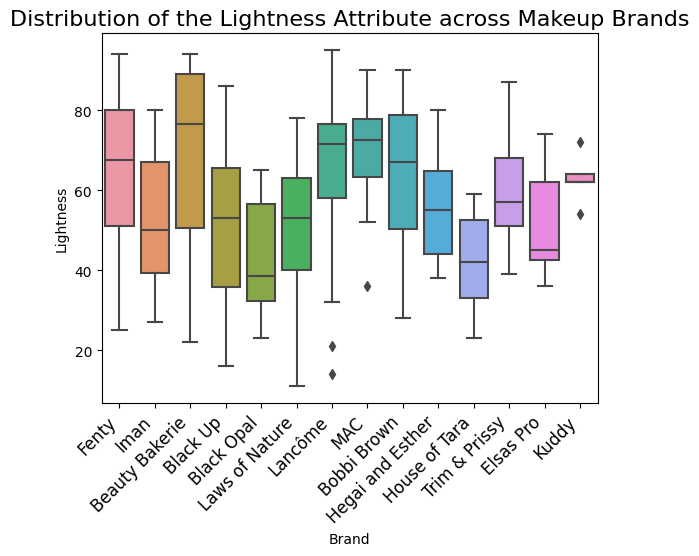

In [66]:
# Visualizing distribution of the Lightness attribute across makeup brands
sns.boxplot(x='Brand', y='Lightness', data=clean_shades_df)
plt.title("Distribution of the Lightness Attribute across Makeup Brands", fontsize=16)

# Rotate x-axis labels for better legibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

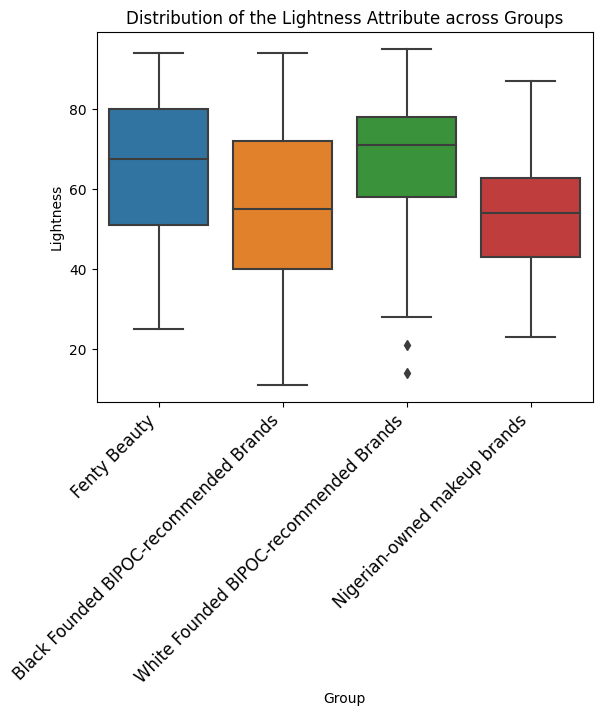

In [67]:
# Box plot to compare the distributions of the 'Lightness' attribute across different groups

sns.boxplot(data=clean_shades_df, x='Group', y='Lightness')
plt.title('Distribution of the Lightness Attribute across Groups')
plt.xlabel('Group')
plt.ylabel('Lightness')

# Rotate x-axis labels for better legibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

### Note: 

In the context of makeup, lightness indicates whether a foundation line caters toward lighter or darker skin tones.    
Essentially, the lower the lightness score of a makeup product, the darker the shade of the product
This is according to: [<a href="https://pudding.cool/2018/06/makeup-shades/" rel="">Pudding essay Beauty Brawl</a>]



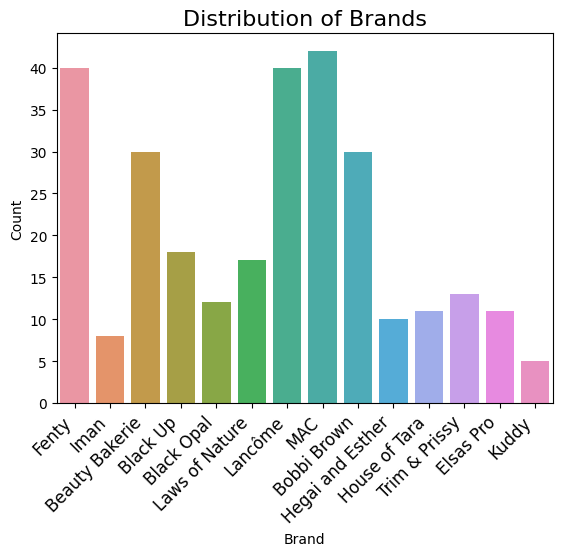

In [70]:
# Distribution of Brands using Seaborn countplot
# plt.figure(figsize=(10, 6))
sns.countplot(data=clean_shades_df, x='Brand')
plt.title('Distribution of Brands', fontsize=16)

plt.xlabel('Brand')
plt.ylabel('Count')

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.show()


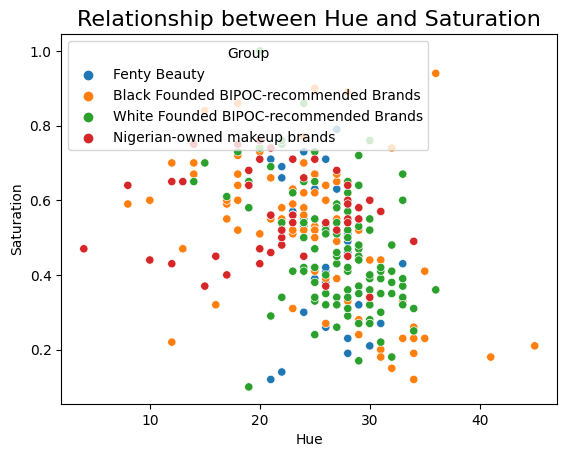

In [76]:
# Scatter plot to visualize the relationship between 'Hue' and 'Saturation' variables
sns.scatterplot(data=clean_shades_df, x='Hue', y='Saturation', hue='Group')
plt.title('Relationship between Hue and Saturation', fontsize=16)
plt.show()


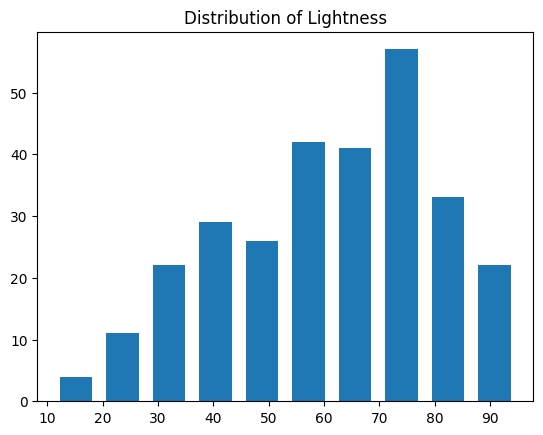

In [77]:
# Distribution of Lightness using Plotly histogram
plt.hist(clean_shades_df['Lightness'], rwidth=0.7)
plt.title("Distribution of Lightness")

plt.show()

EDA of User Images

### Exporting Resulting Dataset for Use in Building the Model

In [78]:
clean_shades_df.to_csv("makeup_products.csv")
print("Products dataset exported successfully")

Products dataset exported successfully
